# Introduction

This blog covers the basics of Text Analytics. We will be using Natural Language Processing and Machine Learning alogorithm to analyse the tweets on the Twitter platform.We will analyse the sentiments of 5000 tweets with certain hashtags and label them as Positive, Negative or Neutral. With this data, we will build a ML model using Naive Bayes Classifier which can be deployed to predict the sentiment of new tweets.We will be using the following python libraries for this analysis:
- tweepy: Library for accessing the Twitter API
- pandas: Library to perform various operations on the data
- nltk: Library to perform Natural Language Processing for English text
- sklearn: Library to perform machine learning algorithms

# Imports
- tweepy: http://docs.tweepy.org/en/latest/
- pandas: https://pandas.pydata.org/docs/user_guide/index.html

In [2]:
import tweepy as tw #library for accessing Twitter API
import pandas as pd #data analysis API
import json

# Scrapping Tweets from Twitter using Tweepy

- You have to first create a Twitter Developer account to gain credentials for Tweepy. This does require that you have a Twitter account. The application will ask various questions about what sort of work you want to do. Don’t fret, these details don’t have to be extensive, and the process is relatively easy. Link- https://developer.twitter.com/en
<div>
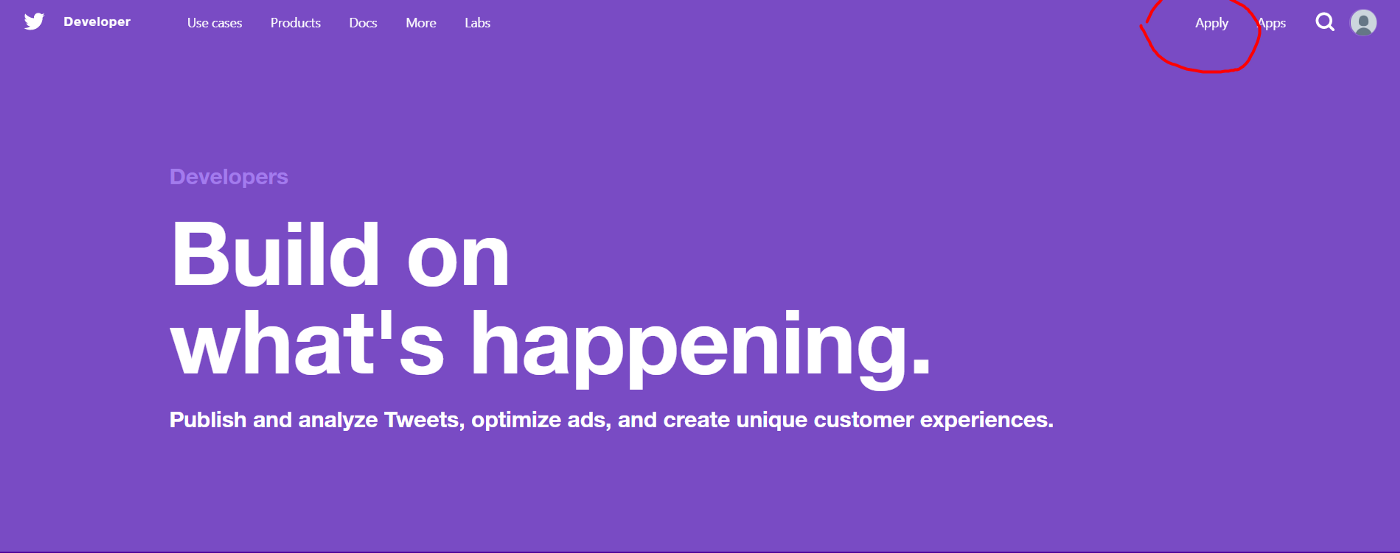
</div>

- After finishing the application, the approval process is relatively quick and shouldn’t take longer than a couple of days. Upon being approved you will need to log in and set up a dev environment in the developer dashboard and view that app’s details to retrieve your developer credentials as shown in the below picture. Unless you specifically have requested access to the other API’s offered, you will now be able to use the standard Tweepy API.
<div>
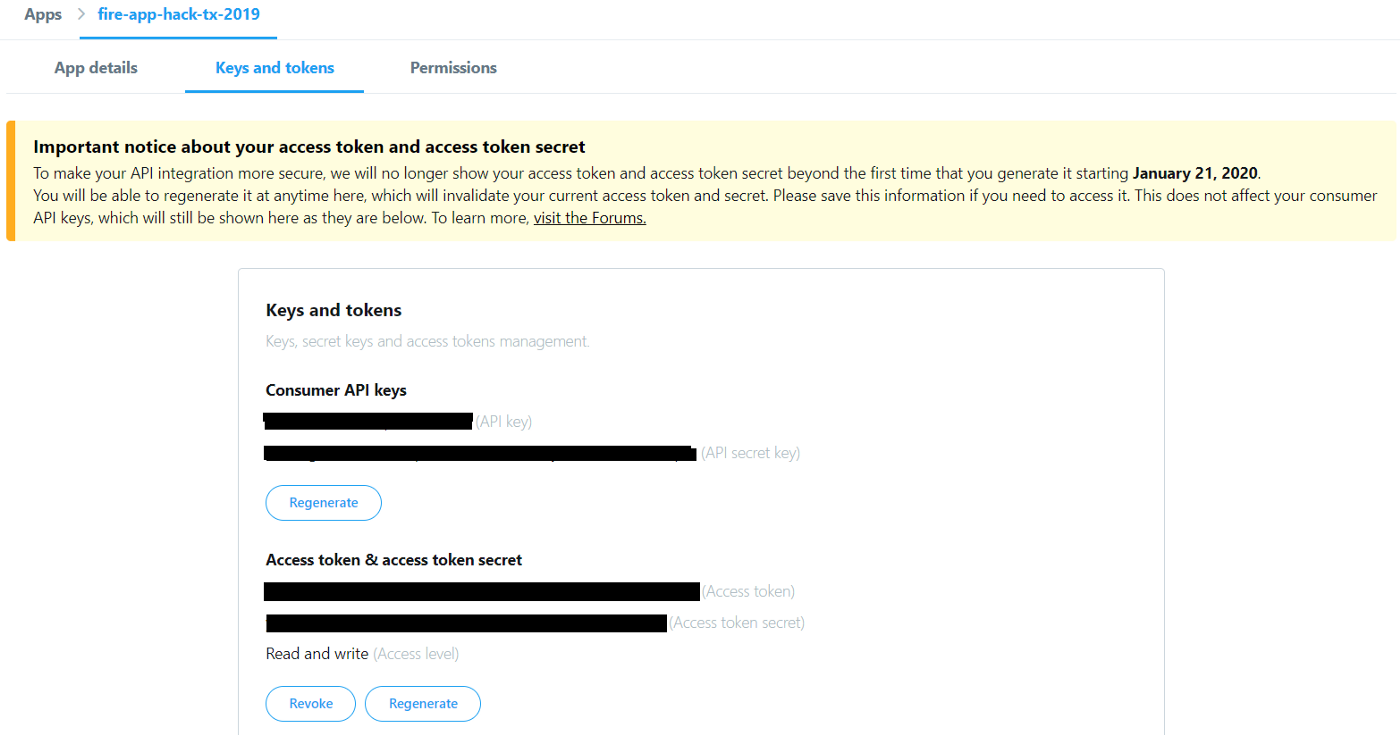
</div>

- Before getting started on Tweepy you will have to authorize that you have the credentials to utilize its API. The code snippet given is how one authorizes themself.
- The search parameters I focused on are q(text query), lang(language of tweets), since(starting date o tweets), include_rts(whether to include retweets or not), items(count of tweets to be extracted). In the below code, I scrape the 5000 of tweets since 1st April 2020 that have following text "#coronavirus, #COVID19, #CoronavirusOutbreak".
- If you want to further customize your search you can view the rest of the search parameters available in the api.search method here- https://tweepy.readthedocs.io/en/latest/api.html#API.search
- One of the advantages of querying with Tweepy is the amount of information contained in the tweet object. I have queried only tweet txt in the below code. If you’re interested in grabbing other information you can view the full list of information available in Tweepy’s tweet object here- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

In [3]:
#Twitter App Auth
consumer_key = '41zvYrOHdiIKgSq7Xf5tbTyrp'
consumer_secret = '3rOqNnBRjjqkEpGfQcmyD9kh6WgGALmTmiI6IJUgILee0Z0Uad'
access_key = '1224090842106757120-gD25mu7R2pNTCQCozu5o9SCSpE8XHG'
access_secret = 'D63jeYIxtByfzbMvwr2SSXycTSyR4Hdm1xCxcAt3mNfY5'

# Initialize API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Search terms
search_words = ["#coronavirus", "#COVID19", "#CoronavirusOutbreak"]
date_since = "2020-04-01"

# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since, tweet_mode='extended',
              include_rts=True).items(5000)

tweets_arr = []

# Iterate and print tweets
for tweet in tweets:
    tweets_arr.append(tweet.full_text)
print("Done")

#Creating data frame of tweets
df_tweets = pd.DataFrame(tweets_arr)
df_tweets

Done


,0
0,RT @chidambara09: #Coronavirus:\n\n#European P...
1,"China denies cover up, but abruptly raises COV..."
2,RT @chidambara09: #Coronavirus:\n\n#European P...
3,RT @pcraindia: With necessary precautions and ...
4,RT @chidambara09: #Coronavirus:\n\n#European P...
...,...
4995,Vietnam sets up 'Rice ATMs' to provide free ri...
4996,Covid19 austerity: New Zealand PM sets example...
4997,"RT @admediainsider: ""This phase has made India..."
4998,RT @pennewstweet: Masks are mandatory in Singa...


# Sentiment Analysis of the scrapped tweets

- Import nltk libraries for doing sentiment analysis: https://www.nltk.org/

In [5]:
# NLP libraries
import nltk
from nltk.tokenize import sent_tokenize #sentence tokenization:break text into sentences
from nltk.tokenize import word_tokenize #word tokenization:break sentences into words
from nltk.corpus import stopwords #removal of stop words
from nltk.stem import PorterStemmer #lexicon Normalisation/Stemming: retain only root form of the word

- Install required packages in nltk with inbuilt sentiment analyser. VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. In this approach, each of the words in the lexicon is rated as to whether it is positive or negative, and in many cases, how positive or negative.

In [6]:
#Using NLTK package to conduct sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\61920959\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

- The polarity scores for each tweet are calculated using Sentiment Intensity Analyser. 
- The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. Hence all these should add up to 1.
- The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

In [8]:
#Sentiment Scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
scores = []
for tweet in tweets_arr:
    score = sid.polarity_scores(tweet)
    scores.append(score)
    
#Dataframe for sentiment scores
df_sentiments = pd.DataFrame(scores)
df_sentiments

dataset = pd.concat([df_tweets, df_sentiments], axis=1, join='inner')
dataset

,0,neg,neu,pos,compound
0,RT @chidambara09: #Coronavirus:\n\n#European P...,0.000,1.000,0.000,0.0000
1,"China denies cover up, but abruptly raises COV...",0.257,0.743,0.000,-0.8047
2,RT @chidambara09: #Coronavirus:\n\n#European P...,0.000,1.000,0.000,0.0000
3,RT @pcraindia: With necessary precautions and ...,0.115,0.885,0.000,-0.3818
4,RT @chidambara09: #Coronavirus:\n\n#European P...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
4995,Vietnam sets up 'Rice ATMs' to provide free ri...,0.000,0.883,0.117,0.5106
4996,Covid19 austerity: New Zealand PM sets example...,0.059,0.941,0.000,-0.1280
4997,"RT @admediainsider: ""This phase has made India...",0.174,0.826,0.000,-0.4588
4998,RT @pennewstweet: Masks are mandatory in Singa...,0.000,0.909,0.091,0.0772


- The overall sentiment of the tweet is computed using the following: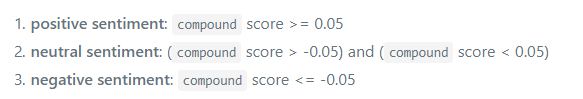
- As we can see, sentiment of around 50% of the tweets is neutral, 27% negative and 23% positive

In [12]:
# Generate overall_sentiment using pandas 
overall_sentiment = [] 
for value in dataset["compound"]: 
    if value >= 0.05: 
        overall_sentiment.append("Positive") 
    elif value <= -0.05: 
        overall_sentiment.append("Negative") 
    else: 
        overall_sentiment.append("Neutral") 
       
dataset["overall_sentiment"] = overall_sentiment    

#dropping the scores columns
data = dataset.drop(columns ={"neg","pos","neu","compound"})

# changing column name with rename() 
data = data.rename(columns = {0: "text"})
print(data)

data.groupby('overall_sentiment').size()

                                                   text overall_sentiment
0     RT @chidambara09: #Coronavirus:\n\n#European P...           Neutral
1     China denies cover up, but abruptly raises COV...          Negative
2     RT @chidambara09: #Coronavirus:\n\n#European P...           Neutral
3     RT @pcraindia: With necessary precautions and ...          Negative
4     RT @chidambara09: #Coronavirus:\n\n#European P...           Neutral
...                                                 ...               ...
4995  Vietnam sets up 'Rice ATMs' to provide free ri...          Positive
4996  Covid19 austerity: New Zealand PM sets example...          Negative
4997  RT @admediainsider: "This phase has made India...          Negative
4998  RT @pennewstweet: Masks are mandatory in Singa...          Positive
4999  RT @QuickTake: Young people are falling seriou...          Negative

[5000 rows x 2 columns]


overall_sentiment
Negative    1356
Neutral     2475
Positive    1169
dtype: int64

# Wordcloud of the Tweet Data

Wordcloud is a powerful visualisation tool to understand what are the main words in the content or what most people are tweeting about. In the below code we have removed the following words from appearing in wordcloud:
1. Words starting with @ (tweet author's name) 
2. Words starting with # (we have extracted tweets with hashtags related to coronavirus) 
3. Words such as RT (which is coming in case it is a re-tweet)

Few interesting observations from the word clouds:
1. Positive wordcloud: United States,deaths reported, new cases - United States is mostly mentioned in tweets with overall positive tone.
2. Negative wordcloud: Europe, seriously ill, young people - Tweets are showing the illness caused by virus and young people might be most affected by this disease. Europe is mostly mentioned in tweets with overall negative tone.
3. Neutral wordcloud: new case, total deaths, total confirmed - These might be general tweets providing coronaviris stats.

Positive words


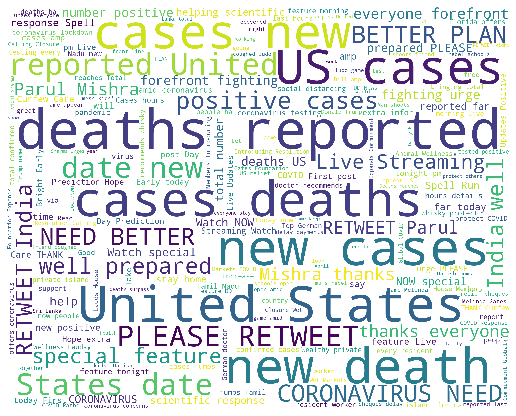

Negative words


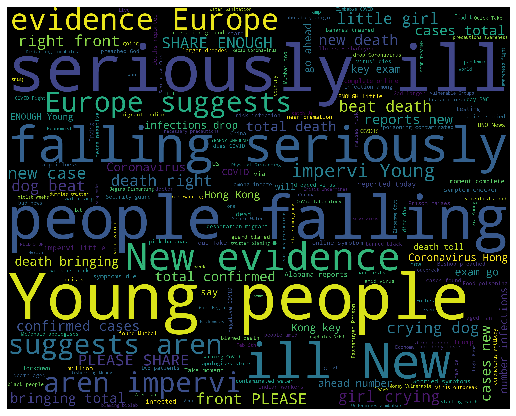

Neutral words


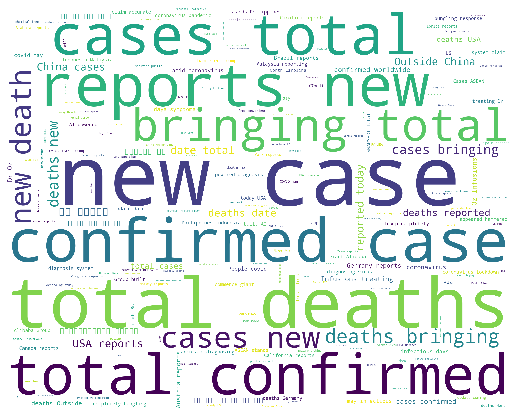

In [15]:
#visualizing word clouds for positive and negative tweets

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

data_pos = data[ data['overall_sentiment'] == 'Positive']
data_pos = data_pos['text']
data_neg = data[ data['overall_sentiment'] == 'Negative']
data_neg = data_neg['text']
data_neu = data[ data['overall_sentiment'] == 'Neutral']
data_neu = data_neu['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(9, 9))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(data_pos,'white')
print("Negative words")
wordcloud_draw(data_neg)
print("Neutral words")
wordcloud_draw(data_neu,'white')

# Naive Bayes Classification Model

- Import sklearn library for building the classification model: https://scikit-learn.org/stable/

In [16]:
#import machine learning libraries

import time
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn import model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

- Split the 5000 tweet data into training (70%) and validation sets (30%)

In [17]:
#Splitting the data in train and test split
t1 = time.time()
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['overall_sentiment'], test_size=0.3,random_state = 0)
t2= time.time()

- We will be using CountVectorizer for performing the following data preprocessing tasks:
    1. Representing the tweet text as bag-of-words for feature extraction
    2. Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.

The output would be the list of words/ tokens that appear in the tweet corpus and number of ocuurences of words in each tweet. 

- However, this would only give the occurences of word in a document which might be not be an ideal metric since larger tweets will have more words. We will solve this by normalising using TF(Term Frequency) - IDF (Inverse Document Frequency) metric explained in this image. TfidfTransform performs this function in Python.
<div>
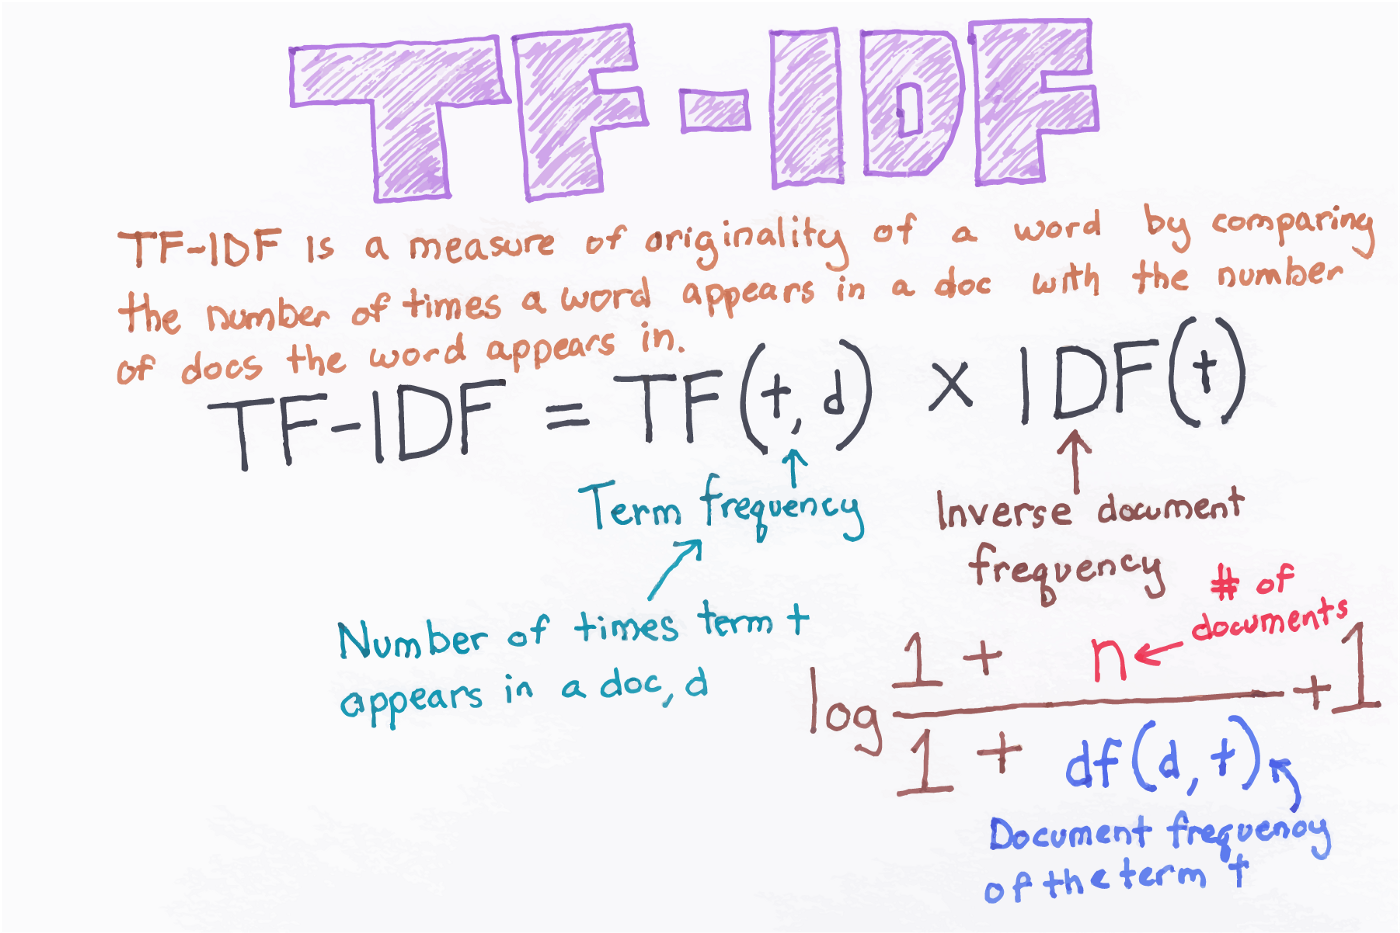
</div>

In [18]:
count_vect = CountVectorizer(lowercase=True,stop_words="english",min_df=10)
count_vect.fit(X_train)

X_train_counts = count_vect.transform(X_train)
X_test_counts = count_vect.transform(X_test)

# Create the tf-idf representation using the bag-of-words matrix

tfidf_transformer = TfidfTransformer(norm=None)
tfidf_transformer.fit(X_train_counts)

X_train_tfid =tfidf_transformer.transform(X_train_counts)
X_test_tfid = tfidf_transformer.transform(X_test_counts)

In [19]:
X_train_counts.shape

(3500, 624)

In [20]:
X_test_counts.shape

(1500, 624)

- We will be building classification model using Naive Bayes algorithm. It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature (a big assumption indeed, that is why model is called Naive). We will be using multinomial naive bayes since there are more than 2 classes (positive, negative, neutral).

- Explained simply, naive bayes algoorithm works by calculating the probabilities using following formula and giving output as the class having highest probability.
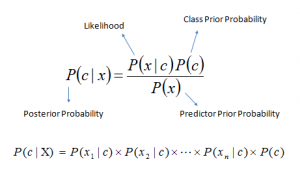

- Our model accuracy on training data is 79% and 76% on test data (which is quite good).

In [21]:
#Applying Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fit data to NB model

nb.fit(X_train_tfid, y_train) # train naive bayes on count

print("Train Accuracy: ", round(nb.score(X_train_tfid,y_train), 3))
print("Test Accuracy: ", round(nb.score(X_test_tfid,y_test), 3))

Train Accuracy:  0.793
Test Accuracy:  0.76


- Using this model, we can predict the sentiment of any new tweet. As given in example below, the tone of the tweet is negative and model performed a well job in predicting the same. Voila!

In [22]:
#predicting the sentiment of a new tweet

docs_new = ['Balancing working from home and shouldering the bulk of domestic tasks leaves many women stretched to capacity, meaning less quality time with their families and for themselves.']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

clf = nb.fit(X_train_tfid, y_train)

predicted = clf.predict(X_new_tfidf)
print(predicted)

['Neutral']


If you have any comments or suggestions please comment below or reach out to me at - [Twitter](https://twitter.com/rahulsingla0959) or [LinkedIn](https://www.linkedin.com/in/rahul-singla1/)